# Projet Uber

## Import des librairies et des données

In [167]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# Import des données 
df = pd.read_csv("uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [169]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

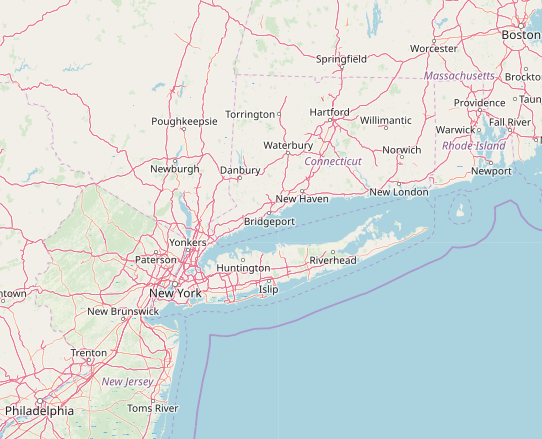

In [170]:
# Où sommes-nous ?
from IPython.display import display, Image
BBox = (df.Lon.min(), df.Lon.max(), df.Lat.min(), df.Lat.max())
ruh_m = plt.imread('map.png')
Image(filename='map.png')
# https://www.openstreetmap.org/export#map=5/51.500/-0.100

In [171]:
df_map = df.drop(columns = ["Date/Time", "Base"])
df_map

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
...,...,...
564511,40.7640,-73.9744
564512,40.7629,-73.9672
564513,40.7443,-73.9889
564514,40.6756,-73.9405


## K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_map = sc.fit_transform(df_map)

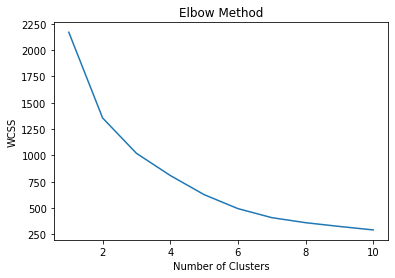

In [5]:
from sklearn.cluster import KMeans
wcss =  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0, n_jobs=-1)
    kmeans.fit(df_map)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Recherche du k optimal : k = 5

In [19]:
kmeans5 = KMeans(n_clusters= 5, init= "k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans5 = kmeans5.fit_predict(df_map)

In [20]:
# Nombre d'échantillons par cluster
cluster_map = pd.DataFrame()
cluster_map['cluster'] = kmeans5.labels_
cluster_map.cluster.value_counts()

1    285153
0    246470
3     14409
2     13712
4      4772
Name: cluster, dtype: int64

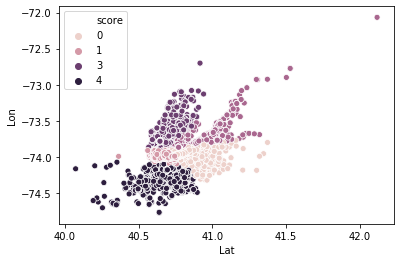

In [48]:
# Représentation graphique des clusters
graph_k5 = pd.DataFrame(kmeans5.labels_ , columns = ['score'])
sns.scatterplot(x = 'Lat' , y = 'Lon' , hue = graph_k5.score , data = df_map)

### Recherche du k optimal : k = 4

In [50]:
kmeans4 = KMeans(n_clusters = 4, init= "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans4 = kmeans4.fit_predict(df_map)
cluster_map = pd.DataFrame()
cluster_map['cluster'] = kmeans4.labels_
cluster_map.cluster.value_counts()

0    285153
1    246470
2     28121
3      4772
Name: cluster, dtype: int64

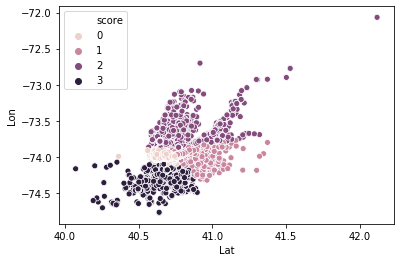

In [51]:
# Représentation graphique des clusters
graph_k4 = pd.DataFrame(kmeans4.labels_ , columns = ['score'])
sns.scatterplot(x = 'Lat' , y = 'Lon' , hue = graph_k4.score , data = df_map)

### Recherche du k optimal : k = 3

In [172]:
kmeans3 = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans3.fit_predict(df_map)
cluster_map = pd.DataFrame()
cluster_map['cluster'] = kmeans3.labels_
cluster_map.cluster.value_counts()

2    288193
0    247153
1     29170
Name: cluster, dtype: int64

In [173]:
graph_k3 = pd.DataFrame(kmeans3.labels_ , columns = ['score'])

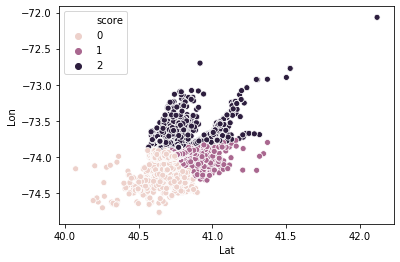

In [53]:
sns.scatterplot(x = 'Lat' , y = 'Lon' , hue = graph_k3.score , data = df_map)

## Mapping des clusters

In [174]:
BBox = (df.Lon.min(), df.Lon.max(), df.Lat.min(), df.Lat.max())
print(BBox)

(-74.7733, -72.0666, 40.0729, 42.1166)


In [175]:
ruh_m = plt.imread('map.png')

In [178]:
df_map['cluster'] = kmeans3.labels_
df_map

,Lat,Lon,cluster
0,40.7690,-73.9549,0
1,40.7267,-74.0345,2
2,40.7316,-73.9873,2
3,40.7588,-73.9776,0
4,40.7594,-73.9722,0
...,...,...,...
564511,40.7640,-73.9744,0
564512,40.7629,-73.9672,0
564513,40.7443,-73.9889,2
564514,40.6756,-73.9405,2


In [179]:
df_map0 = df_map.query("cluster == 0")
df_map1 = df_map.query("cluster == 1")
df_map2 = df_map.query("cluster == 2")

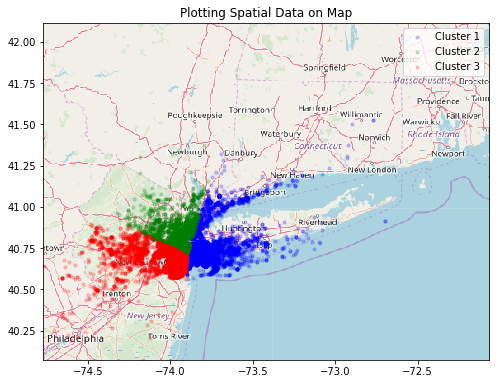

In [147]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_map0.Lon, df_map0.Lat, zorder=1, alpha= 0.2, c='b', s=10, label = "Cluster 1")
ax.scatter(df_map1.Lon, df_map1.Lat, zorder=1, alpha= 0.2, c='g', s=10, label = "Cluster 2")
ax.scatter(df_map2.Lon, df_map2.Lat, zorder=1, alpha= 0.2, c='r', s=10, label = "Cluster 3")
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(loc = "upper right")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Clusters en fonction des périodes de la journée

In [180]:
df_time = df.drop(columns = ["Base"])
df_time

,Date/Time,Lat,Lon
0,4/1/2014 0:11:00,40.7690,-73.9549
1,4/1/2014 0:17:00,40.7267,-74.0345
2,4/1/2014 0:21:00,40.7316,-73.9873
3,4/1/2014 0:28:00,40.7588,-73.9776
4,4/1/2014 0:33:00,40.7594,-73.9722
...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744
564512,4/30/2014 23:26:00,40.7629,-73.9672
564513,4/30/2014 23:31:00,40.7443,-73.9889
564514,4/30/2014 23:32:00,40.6756,-73.9405


In [181]:
df_time['Date/Time'] = pd.to_datetime(df_time['Date/Time'], format = "%m/%d/%Y %H:%M:%S")

In [182]:
df_time['Heure'] = df_time['Date/Time'].dt.hour
df_time['Jour'] = df_time['Date/Time'].dt.weekday
df_time.Jour = df_time.Jour.apply(lambda x: 'Lundi' if x == 0
                               else 'Mardi' if x == 1
                               else 'Mercredi' if x == 2
                               else 'Jeudi' if x == 3
                               else 'Vendredi' if x == 4
                               else 'Samedi' if x == 5
                               else 'Dimanche' )
# df_time['Période'] = df_time.Heure.apply(lambda x: 'Nuit' if x <= 6
#                                         else 'Matin' if x <= 12 
#                                         else 'Après-midi' if x <= 19
#                                         else 'Soirée')
df_time['Période'] = df_time.Heure.apply(lambda x: 0 if x <= 6
                                         else 1 if x <= 12 
                                         else 2 if x <= 19
                                         else 3)
df_time.head()

,Date/Time,Lat,Lon,Heure,Jour,Période
0,2014-04-01 00:11:00,40.7690,-73.9549,0,Mardi,0
1,2014-04-01 00:17:00,40.7267,-74.0345,0,Mardi,0
2,2014-04-01 00:21:00,40.7316,-73.9873,0,Mardi,0
3,2014-04-01 00:28:00,40.7588,-73.9776,0,Mardi,0
4,2014-04-01 00:33:00,40.7594,-73.9722,0,Mardi,0


In [183]:
df_time.groupby("Heure").count().sort_values(by = "Lon", ascending = False)

,Date/Time,Lat,Lon,Jour,Période
Heure,,,,,
17,45475,45475,45475,45475,45475
18,43003,43003,43003,43003,43003
16,42003,42003,42003,42003,42003
19,38923,38923,38923,38923,38923
21,36964,36964,36964,36964,36964
20,36244,36244,36244,36244,36244
15,35324,35324,35324,35324,35324
22,30645,30645,30645,30645,30645
14,27190,27190,27190,27190,27190


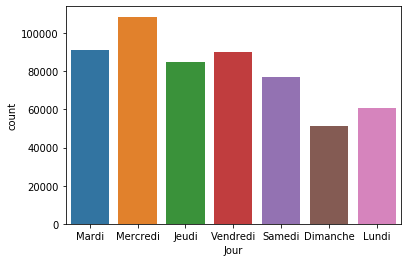

In [184]:
sns.countplot(df_time.Jour)

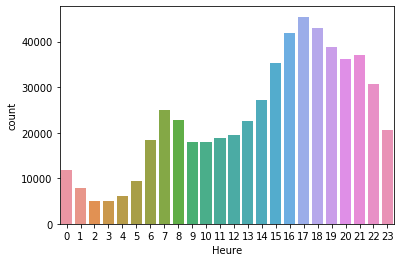

In [185]:
sns.countplot(df_time.Heure)

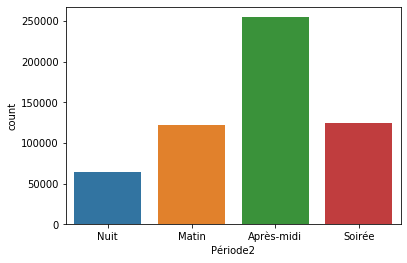

In [186]:
df_time['Période2'] = df_time.Heure.apply(lambda x: 'Nuit' if x <= 6
                                         else 'Matin' if x <= 12 
                                         else 'Après-midi' if x <= 19
                                         else 'Soirée')
sns.countplot(df_time.Période2)

In [187]:
df_map["Période"] = df_time["Période"]

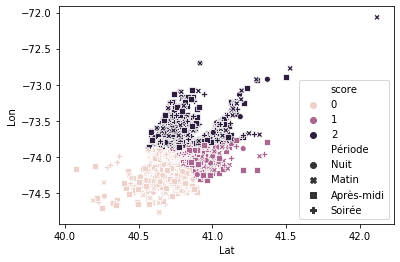

In [101]:
sns.scatterplot(x = 'Lat', y = 'Lon', hue = graph_k3.score , style="Période", data = df_map)

In [190]:
df_map0 = df_map.query("cluster == 0")
df_map1 = df_map.query("cluster == 1")
df_map2 = df_map.query("cluster == 2")

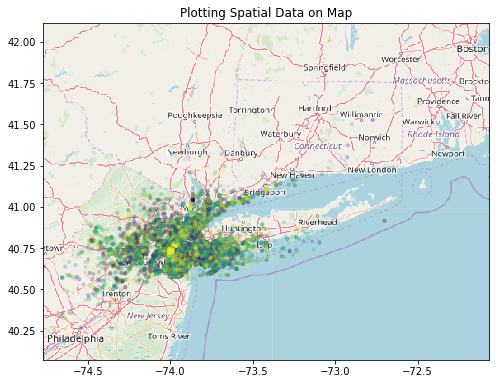

In [122]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_map0.Lon, df_map0.Lat, zorder=1, alpha= 0.2, c=df_map0.Période, s=10)
ax.scatter(df_map1.Lon, df_map1.Lat, zorder=1, alpha= 0.2, c=df_map1.Période, s=10)
ax.scatter(df_map2.Lon, df_map2.Lat, zorder=1, alpha= 0.2, c=df_map2.Période, s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [191]:
# Cluster 1
df_map0_nuit = df_map.query("cluster == 0 and Période == 0")
df_map0_matin = df_map.query("cluster == 0 and Période == 1")
df_map0_am = df_map.query("cluster == 0 and Période == 2")
df_map0_soir = df_map.query("cluster == 0 and Période == 3")

In [192]:
df_map0.groupby("Période").count().sort_values(by = "Lon", ascending = False)

,Lat,Lon,cluster
Période,,,
2,122967,122967,122967
1,56228,56228,56228
3,46308,46308,46308
0,21650,21650,21650


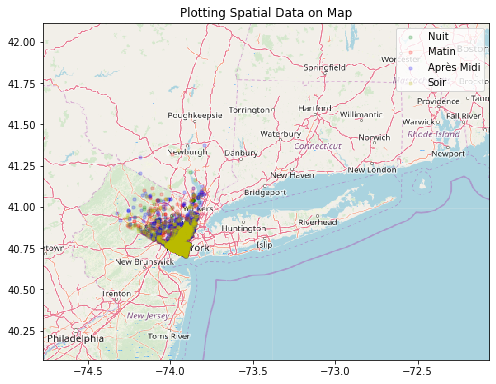

In [196]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_map0_nuit.Lon, df_map0_nuit.Lat, zorder=1, alpha= 0.2, c="g", s=10, label = "Nuit")
ax.scatter(df_map0_matin.Lon, df_map0_matin.Lat, zorder=1, alpha= 0.2, c="r", s=10, label = "Matin")
ax.scatter(df_map0_am.Lon, df_map0_am.Lat, zorder=1, alpha= 0.2, c="b", s=10, label = "Après Midi")
ax.scatter(df_map0_soir.Lon, df_map0_soir.Lat, zorder=1, alpha= 0.2, c="y", s=10, label = "Soir")
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(loc = "upper right")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [135]:
# Cluster 2
df_map1_nuit = df_map.query("cluster == 1 and Période == 0")
df_map1_matin = df_map.query("cluster == 1 and Période == 1")
df_map1_am = df_map.query("cluster == 1 and Période == 2")
df_map1_soir = df_map.query("cluster == 1 and Période == 3")

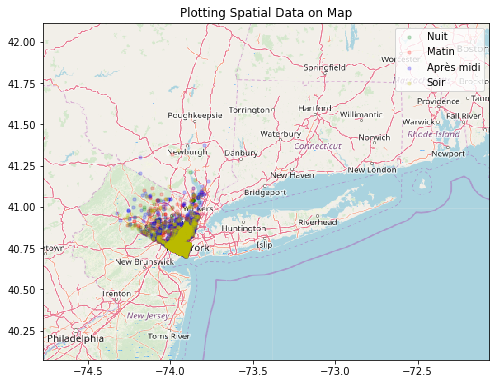

In [146]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_map1_nuit.Lon, df_map1_nuit.Lat, zorder=1, alpha= 0.2, c="g", s=10, label = "Nuit")
ax.scatter(df_map1_matin.Lon, df_map1_matin.Lat, zorder=1, alpha= 0.2, c="r", s=10, label = "Matin")
ax.scatter(df_map1_am.Lon, df_map1_am.Lat, zorder=1, alpha= 0.2, c="b", s=10, label = "Après midi")
ax.scatter(df_map1_soir.Lon, df_map1_soir.Lat, zorder=1, alpha= 0.2, c="y", s=10, label = "Soir")
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(loc = "upper right")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [137]:
# Cluster 3
df_map2_nuit = df_map.query("cluster == 2 and Période == 0")
df_map2_matin = df_map.query("cluster == 2 and Période == 1")
df_map2_am = df_map.query("cluster == 2 and Période == 2")
df_map2_soir = df_map.query("cluster == 2 and Période == 3")

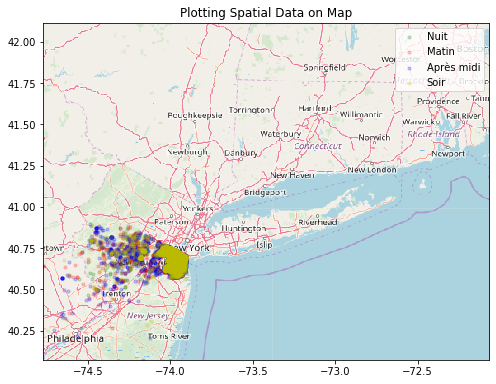

In [149]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_map2_nuit.Lon, df_map2_nuit.Lat, zorder=1, alpha= 0.2, c="g", s=10, label = "Nuit" )
ax.scatter(df_map2_matin.Lon, df_map2_matin.Lat, zorder=1, alpha= 0.2, c="r", s=10, label = "Matin")
ax.scatter(df_map2_am.Lon, df_map2_am.Lat, zorder=1, alpha= 0.2, c="b", s=10, label = "Après midi")
ax.scatter(df_map2_soir.Lon, df_map2_soir.Lat, zorder=1, alpha= 0.2, c="y", s=10, label = "Soir")
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(loc = "upper right")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.5, min_samples=15, n_jobs = -1)
dbscan_predict = clustering.fit_predict(df_map)